In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [100]:
# Set dataset path
dataset_path = "datasets/skin_data"

# Define class names
# class_names = [
#     "Eczema", "Warts", "Melanoma", "Atopic Dermatitis", "Basal Cell Carcinoma", 
#     "Melanocytic Nevi", "Benign Keratosis-like Lesions", "Psoriasis", "Seborrheic Keratoses", "Tinea Ringworm","Warts Molluscum"
# ]

class_names = ["Atopic Dermatitis","Basal Cell Carcinoma","Benign Keratosis-like Lesions","Eczema", "Melanocytic Nevi","Melanoma","Psoriasis pictures Lichen Planus","Seborrheic Keratoses","Tinea Ringworm",
              "Warts","Warts Molluscum"]

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='int'
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='int'
)

Found 27153 files belonging to 11 classes.
Using 21723 files for training.
Found 27153 files belonging to 11 classes.
Using 5430 files for validation.


In [4]:
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [5]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
])

In [6]:
normalization_layer = layers.Rescaling(1./255)

In [7]:
def preprocess(image, label):
    image = normalization_layer(image)
    image = data_augmentation(image)
    return image, label

In [8]:
dataset = dataset.map(preprocess)
val_dataset = val_dataset.map(preprocess)

In [9]:
model = keras.Sequential([
    keras.Input(shape=(224, 224, 3)),  # Define input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
epochs = 10
history = model.fit(dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.3743 - loss: 1.7559 - val_accuracy: 0.5053 - val_loss: 1.3519
Epoch 2/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 901s 1s/step - accuracy: 0.4788 - loss: 1.4076 - val_accuracy: 0.5276 - val_loss: 1.2856
Epoch 3/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 871s 1s/step - accuracy: 0.5162 - loss: 1.2868 - val_accuracy: 0.5654 - val_loss: 1.1526
Epoch 4/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - accuracy: 0.5325 - loss: 1.2378 - val_accuracy: 0.5276 - val_loss: 1.2554
Epoch 5/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 990s 1s/step - accuracy: 0.5417 - loss: 1.1903 - val_accuracy: 0.5510 - val_loss: 1.1656
Epoch 6/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 923s 1s/step - accuracy: 0.5617 - loss: 1.1524 - val_accuracy: 0.6022 - val_loss: 1.0553
Epoch 7/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.5652 - loss: 1.1291 - val_accuracy: 0.5827 - val_loss: 1.0975
Epoch 8/10
679/679 ━━━━━━━━━━━━━━━━━━━━ 839s 1s/step - accuracy: 0.5841 - loss: 1.0879 - val_acc

In [28]:
import joblib
joblib.dump(model, "skin_cancer.pkl")

['skin_cancer.pkl']

In [54]:
model.save("skin_cancer_data.keras")

11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
Accuracy: 68.75%


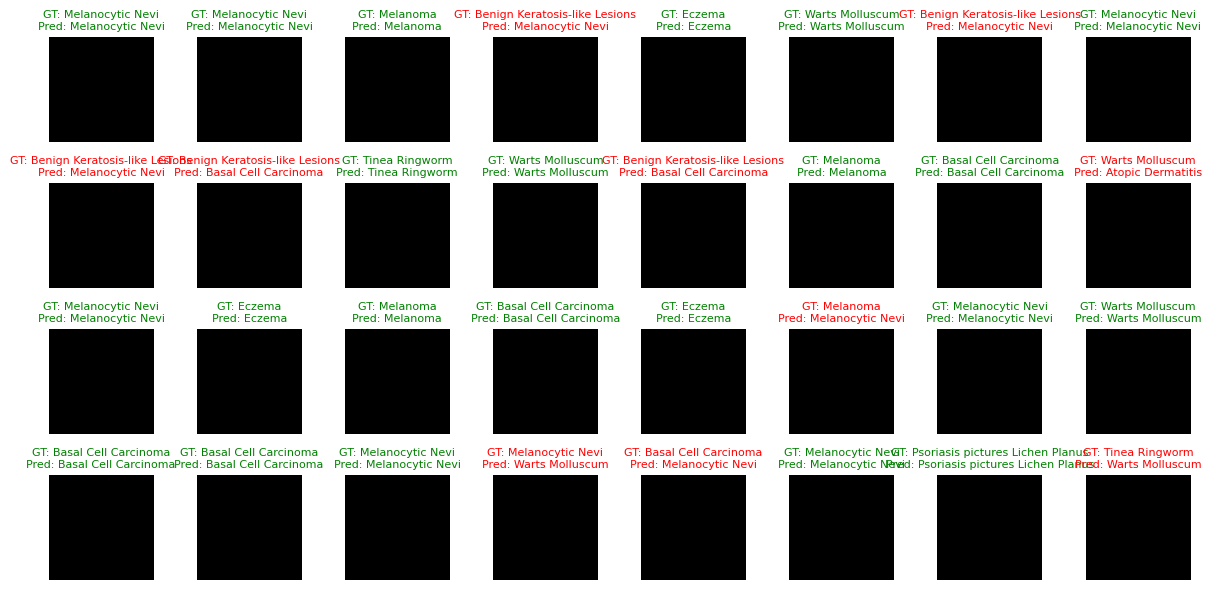

In [127]:
import numpy as np

# Get class names from dataset
class_names = ["Atopic Dermatitis","Basal Cell Carcinoma","Benign Keratosis-like Lesions","Eczema", "Melanocytic Nevi","Melanoma","Psoriasis pictures Lichen Planus","Seborrheic Keratoses","Tinea Ringworm",
              "Warts","Warts Molluscum"]
print(len(class_names))

for images, labels in val_dataset.take(1):  # Take one batch
    predictions = model.predict(images)  # Get predictions
    predicted_classes = np.argmax(predictions, axis=1)  # Get highest probability class
    
    # Compute accuracy
    accuracy = np.mean(predicted_classes == labels.numpy()) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Show images with actual vs predicted labels
    plt.figure(figsize=(12, 6))
    for i in range(len(images)):
        plt.subplot(4, 8, i + 1)  # Adjust grid size as needed
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image
        plt.axis("off")
        actual = class_names[labels[i].numpy()]
        predicted = class_names[predicted_classes[i]]
        color = "green" if actual == predicted else "red"  # Green if correct, red if wrong
        plt.title(f"GT: {actual}\nPred: {predicted}", fontsize=8, color=color)
    
    plt.tight_layout()
    plt.show()
    break  # Stop after first batch